In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
return_df =pd.read_csv("new_return_df_with_feature.csv") 

In [4]:
return_df.ReturnRate = return_df.ReturnRate*100

In [5]:
from sklearn.ensemble import RandomForestClassifier  # For classification
from sklearn.ensemble import RandomForestRegressor  # For regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd

In [11]:
return_df = return_df.dropna()

In [12]:
X = return_df.drop(['ReturnRate','SALEDATE'], axis=1)
y = return_df['ReturnRate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Create a Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

In [18]:
mse

4.975555457795554

In [19]:
np.mean(y_test)

8.33469104293831

In [15]:
rf.score(X_test, y_test)

0.5214345749343572

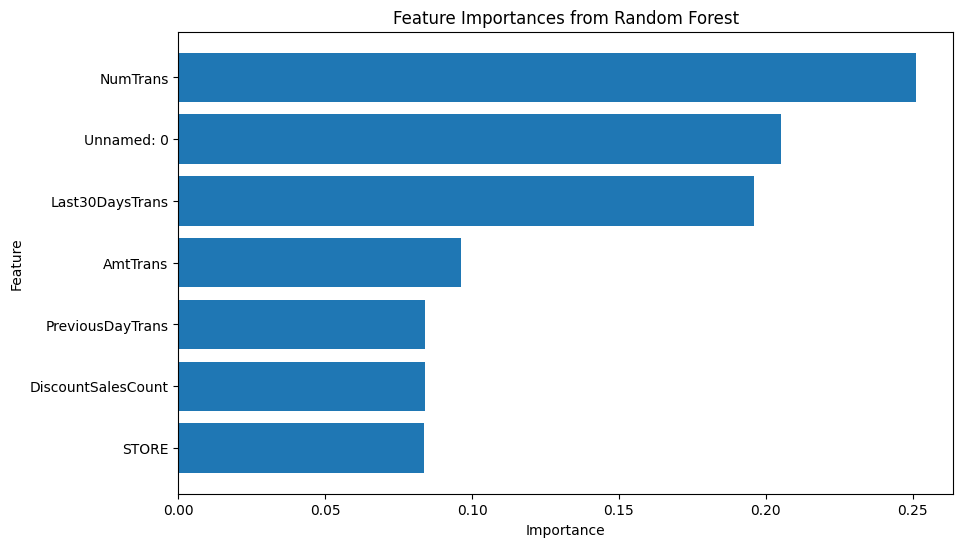

In [25]:
importances = rf.feature_importances_

# Convert the importances into a DataFrame for easier plotting
feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis() # To display the highest importance at the top
plt.show()

In [16]:
from sklearn.neural_network import MLPRegressor

# Create a Multi-Layer Perceptron Regressor model
# This is a simple neural network with 1 hidden layer of 128 neurons
mlp = MLPRegressor(hidden_layer_sizes=(128,64,1), solver='adam', max_iter=500, random_state=42)

# Fit the model on the training data
mlp.fit(X_train, y_train)

# Predict on the test data
y_pred_mlp = mlp.predict(X_test)

# Calculate the Mean Squared Error for the neural network predictions
mse_mlp = mean_squared_error(y_test, y_pred_mlp)



In [17]:
mse_mlp

10.397080087377072

In [31]:
np.mean(y_test)

8.338095585267371

In [32]:
transaction = pd.read_csv("../trnsact_new.csv")

In [54]:
seq_num = transaction[(transaction['SEQ'] == 0)]

In [55]:
seq_num.

,SKU,STORE,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,AMT,INTERID,MIC,UNKNOWN
3,3,709,360,500,0,2005-08-14,P,1,0.0,30.0,30.0,6500000,818,0
4,3,802,660,400,0,2005-08-09,P,1,440.0,30.0,30.0,4700000,599,0
5,3,1202,400,2100,0,2004-11-11,P,1,0.0,30.0,30.0,8600000,999,0
6,3,1204,220,3400,0,2004-12-22,P,1,0.0,30.0,30.0,17600000,555,0
7,3,1304,160,3500,0,2004-08-07,P,1,0.0,30.0,30.0,11400000,990,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120916889,9999997,2707,130,12900,0,2005-08-05,P,1,39.0,19.5,19.5,72800124,395,0
120916891,9999997,7507,750,2800,0,2005-04-23,P,1,39.0,39.0,39.0,593900116,395,0
120916892,9999997,7907,790,3200,0,2005-05-03,P,1,39.0,39.0,39.0,502600061,395,0
120916893,9999997,7907,800,700,0,2005-05-04,R,1,39.0,39.0,39.0,600900066,395,0


In [39]:
transaction['INTERID']

0              3500000
1             15200000
2              4600000
3              6500000
4              4700000
               ...    
120916891    593900116
120916892    502600061
120916893    600900066
120916894    601000066
120916895    658600082
Name: INTERID, Length: 120916896, dtype: int64

In [50]:
transaction['SEQ']

0            326708721
1            326708721
2             23702074
3                    0
4                    0
               ...    
120916891            0
120916892            0
120916893            0
120916894            0
120916895    257808914
Name: SEQ, Length: 120916896, dtype: int64

# Test

In [20]:
return_df

,Unnamed: 0,SALEDATE,STORE,ReturnRate,NumTrans,DiscountSalesCount,AmtTrans,PreviousDayTrans,Last30DaysTrans
323,323,2004-08-02,102,9.426752,785,345,19914.37,1171.0,1956.0
324,324,2004-08-02,103,14.490862,766,365,21324.65,658.0,1424.0
325,325,2004-08-02,107,9.484193,1202,515,29779.03,1492.0,2694.0
326,326,2004-08-02,202,13.913043,575,247,14470.92,786.0,1361.0
327,327,2004-08-02,203,12.500000,664,362,21616.40,665.0,1329.0
...,...,...,...,...,...,...,...,...,...
125915,125915,2005-08-27,9704,6.416667,1200,911,20079.25,698.0,16920.0
125916,125916,2005-08-27,9709,5.178702,1371,952,24007.62,1196.0,22664.0
125917,125917,2005-08-27,9804,5.671078,1587,1173,29260.54,1071.0,24603.0
125918,125918,2005-08-27,9806,0.262467,1143,516,33762.85,1252.0,51301.0
